## Candy Hirarchy data 2017

### import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
sns.set(style='ticks')
%matplotlib inline

read data

In [2]:
candy=pd.read_csv('candyhierarchy2017.csv',encoding='latin1')

In [3]:
candy.head()

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,...,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
0,90258773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,...,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(84, 25)"
2,90272829,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90272840,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,...,NaN,Raisins can go to hell,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(75, 23)"
4,90272841,No,Male,23,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,...,NaN,NaN,White and gold,NaN,Friday,NaN,1.0,NaN,NaN,"(70, 10)"


### let's drop these 2 columns as a start

In [4]:
candy.drop(columns=['Unnamed: 113','Internal ID',],inplace=True)

In [5]:
candy.shape

(2460, 118)

In [6]:
sorted(candy)

['Click Coordinates (x, y)',
 'Q10: DRESS',
 'Q11: DAY',
 'Q12: MEDIA [Daily Dish]',
 'Q12: MEDIA [ESPN]',
 'Q12: MEDIA [Science]',
 'Q12: MEDIA [Yahoo]',
 'Q1: GOING OUT?',
 'Q2: GENDER',
 'Q3: AGE',
 'Q4: COUNTRY',
 'Q5: STATE, PROVINCE, COUNTY, ETC',
 'Q6 | 100 Grand Bar',
 "Q6 | Abstained from M&M'ing.",
 'Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)',
 'Q6 | Any full-sized candy bar',
 'Q6 | Black Jacks',
 "Q6 | Blue M&M's",
 'Q6 | Bonkers (the board game)',
 'Q6 | Bonkers (the candy)',
 'Q6 | Bottle Caps',
 "Q6 | Box'o'Raisins",
 'Q6 | Broken glow stick',
 'Q6 | Butterfinger',
 'Q6 | Cadbury Creme Eggs',
 'Q6 | Candy Corn',
 'Q6 | Candy that is clearly just the stuff given out for free at restaurants',
 'Q6 | Caramellos',
 'Q6 | Cash, or other forms of legal tender',
 'Q6 | Chardonnay',
 'Q6 | Chick-o-Sticks (we donÕt know what that is)',
 'Q6 | Chiclets',
 'Q6 | Coffee Crisp',
 'Q6 | Creepy Religious comics/Chick Tracts',
 'Q6 | Dental p

### clean column names

In [7]:
col_names=candy.columns

In [8]:
col_names=col_names.str[4:]
col_names=col_names.str.replace('|','')
col_names=col_names.str.replace(':','')
col_names=col_names.str.strip()

In [9]:
col_names

Index(['GOING OUT?', 'GENDER', 'AGE', 'COUNTRY',
       'STATE, PROVINCE, COUNTY, ETC', '100 Grand Bar',
       'Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)',
       'Any full-sized candy bar', 'Black Jacks', 'Bonkers (the candy)',
       ...
       'JOY OTHER', 'DESPAIR OTHER', 'OTHER COMMENTS', 'DRESS', 'DAY',
       'MEDIA [Daily Dish]', 'MEDIA [Science]', 'MEDIA [ESPN]',
       'MEDIA [Yahoo]', 'k Coordinates (x, y)'],
      dtype='object', length=118)

In [10]:
candy.columns=col_names

### let's examine Age column

In [11]:
candy['AGE'].unique()

array([nan, '44', '49', '40', '23', '53', '33', '43', '56', '64', '37',
       '59', '48', '54', '36', '45', '25', '34', '35', '38', '58', '50',
       '47', '16', '52', '63', '65', '41', '27', '31', '61', '46', '42',
       '62', '29', '39', '32', '28', '69', '67', '30', '22', '26', '51',
       '70', '24', '18', '19', 'Old enough', '57', '60', '66', '12',
       'Many', '55', '72', '?', '21', '11', 'no', '9', '68', '20', '6',
       '10', '71', '90', '13', '45-55', '312', '99', '7', 'hahahahaha',
       '88', '39.4', '74', '102', 'older than dirt', '17', '15', '8',
       '75', '5u', 'Enough', 'See question 2', '24-50', '14', 'Over 50',
       '100', '76', '1000', 'sixty-nine', '46 Halloweens.', 'ancient',
       '77', 'OLD', 'old', '73', '70 1/2', '1', 'MY NAME JEFF', '4',
       '59 on the day after Halloween', 'old enough', 'your mom',
       'I can remember when Java was a cool new language', '60+'],
      dtype=object)

In [12]:
candy.AGE.replace(['Old enough','Many','?','no','45-55','hahahahaha','older than dirt','5u','Enough'
                  'See question 2', '24-50', 'Over 50','sixty-nine', '46 Halloweens.', 'ancient',
                  'OLD', 'old', '70 1/2', '1', 'MY NAME JEFF', 
       '59 on the day after Halloween', 'old enough', 'your mom',
       'I can remember when Java was a cool new language', '60+'],np.nan,inplace=True)

In [13]:
candy['AGE']=pd.to_numeric(candy['AGE'],errors='coerce')

#### let's check if there's outliers..

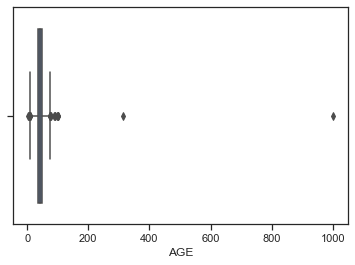

In [14]:
ax=sns.boxplot(x=candy['AGE'])

In [15]:
np.nanmedian(candy['AGE'])

41.0

In [16]:
candy['AGE'].fillna(41,inplace=True)

In [17]:
candy['AGE']=candy['AGE'].astype('float')

Let's detect outliers and remove them using IQR

In [18]:
Q1 = candy.quantile(0.25)
Q3 = candy.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

AGE                   15.0
MEDIA [Daily Dish]     0.0
MEDIA [Science]        0.0
MEDIA [ESPN]           0.0
MEDIA [Yahoo]          0.0
dtype: float64


In [19]:
candy = candy[~((candy < (Q1 - 1.5 * IQR)) |(candy > (Q3 + 1.5 * IQR))).any(axis=1)]

#### country field was a text box so there'll be some funny comments -_-

In [20]:
candy['COUNTRY']=candy.COUNTRY.str.lower()

In [21]:
candy['COUNTRY'].unique()

array([nan, 'usa ', 'usa', 'us', 'canada', 'murica', 'united states',
       'uk', 'united kingdom', 'united states ', 'united staes',
       'united states of america', 'uae', 'england', 'canada ', 'mexico',
       'u.s.a.', 'usausausa', 'america', '35', 'france',
       'united states of america ', 'finland', 'unhinged states',
       'us of a', 'unites states', 'the united states', 'unied states',
       'netherlands', 'germany', 'u s', 'u.s.', 'u.k. ', 'costa rica',
       'the united states of america', 'unite states', '46', 'cascadia',
       'insanity lately', 'greece', 'usa? hard to tell anymore..', 'usas',
       'pittsburgh', '45', 'united state', '32', 'australia', 'can',
       'canae', 'new york', 'trumpistan', 'ireland', 'united sates',
       'korea', 'california', 'japan', 'south africa',
       'i pretend to be from canada, but i am really from the united states.',
       'iceland', 'canada`', 'scotland', 'uk ', 'denmark',
       'united stated', 'france ', 'switzerlan

#### Looks like american people are kinda funny..

In [22]:
candy.COUNTRY.replace(to_replace=['usa', 'us', 'united states','united staes','united states of america','u.s.a.', 'usausausa', 'america', '35',
                      'united states of america ', 'unhinged states',
       'us of a', 'unites states', 'the united states', 'north carolina ','unied states','earth', 'u s',
       'u.s.','the united states of america',
       'unite states', '46', 'cascadia','insanity lately', "'merica",'usas', 'pittsburgh', '45', 'united state',
       '32', 'a', 'can', 'canae', 'new york','united sates','california', 'united stated','united ststes','usa! usa! usa!', 'usaa','n. america','u.s. ', '1',
       'subscribe to dm4uz3 on youtube', 'usa usa usa!!!!',
       "i don't know anymore", 'fear and loathing' ,'united states','united states','usa ','atlantis','united states ','new jersey','trumpistan','usa? hard to tell anymore..','i pretend to be from canada, but i am really from the united states.',
'ahem....amerca','ussa', 'narnia', 'u s a',
 'united statss','united statea'],value='usa',inplace=True)

In [23]:
candy.COUNTRY.replace(to_replace=['uk', 'united kingdom','u.k. ','uk ','ud','endland','england','ireland'],value='uk',inplace=True)

In [24]:
candy.COUNTRY.replace(to_replace='the netherlands',value='netherlands',inplace=True)

In [25]:
candy.COUNTRY.replace(to_replace=['canada','canada ','canada`'],value='canada',inplace=True)

In [26]:
candy.COUNTRY.replace(to_replace=[ 'murica','murrika'],value='murika',inplace=True)

In [27]:
candy.COUNTRY.replace(to_replace=['scotland '],value='scotland',inplace=True)

In [28]:
candy.COUNTRY.replace('hong kong','china',inplace=True)

In [29]:
candy.COUNTRY.replace('europe','uk',inplace=True)

In [30]:
candy['COUNTRY'].unique()

array([nan, 'usa', 'canada', 'murika', 'uk', 'uae', 'mexico', 'france',
       'finland', 'netherlands', 'germany', 'costa rica', 'greece',
       'australia', 'korea', 'japan', 'south africa', 'iceland',
       'scotland', 'denmark', 'france ', 'switzerland', 'south korea',
       'indonesia', 'alaska', 'soviet canuckistan', 'singapore', 'taiwan',
       'china', 'ireland ', 'spain', 'sweden'], dtype=object)

In [31]:
candy.COUNTRY.fillna('usa',inplace=True)

In [32]:
candy.columns

Index(['GOING OUT?', 'GENDER', 'AGE', 'COUNTRY',
       'STATE, PROVINCE, COUNTY, ETC', '100 Grand Bar',
       'Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)',
       'Any full-sized candy bar', 'Black Jacks', 'Bonkers (the candy)',
       ...
       'JOY OTHER', 'DESPAIR OTHER', 'OTHER COMMENTS', 'DRESS', 'DAY',
       'MEDIA [Daily Dish]', 'MEDIA [Science]', 'MEDIA [ESPN]',
       'MEDIA [Yahoo]', 'k Coordinates (x, y)'],
      dtype='object', length=118)

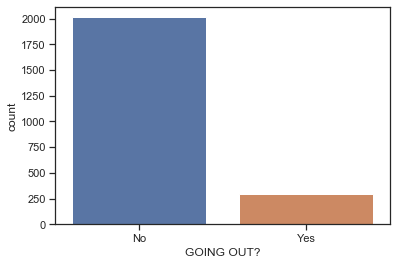

In [33]:
sns.countplot(candy['GOING OUT?'])

In [34]:
candy['GOING OUT?'].value_counts()

No     2013
Yes     290
Name: GOING OUT?, dtype: int64

#### most people are staying home, okay

In [35]:
candy['GOING OUT?'].isnull().sum()

110

#### let's fill those null values with mode

In [36]:
candy['GOING OUT?'].fillna('No',inplace=True)

#### let's now drop column that are not candy

In [37]:
candy.drop(['White Bread', 'Whole Wheat anything','Vicodin','Creepy Religious comics/Chick Tracts',
        'Real Housewives of Orange County Season 9 Blue-Ray', 'STATE, PROVINCE, COUNTY, ETC'],axis=1,inplace=True)

In [38]:
candy.drop(['Any full-sized candy bar',
            "Abstained from M&M'ing.",
           'Bonkers (the board game)','Cash, or other forms of legal tender',
            'Chardonnay',
        'Dental paraphenalia','Dove Bars',
            'Generic Brand Acetaminophen',
           'Broken glow stick',
            'Hugs (actual physical hugs)',
           "Independent M&M's",'Jolly Rancher (bad flavor)',
            'Nerds','Pencils','Regular M&Ms',],axis=1,inplace=True)

In [39]:
candy.drop(['JOY OTHER','DESPAIR OTHER', 'OTHER COMMENTS','DRESS'],axis=1,inplace=True)

In [40]:
candy.drop(['MEDIA [Daily Dish]', 'MEDIA [Science]', 'MEDIA [ESPN]',
       'MEDIA [Yahoo]', 'k Coordinates (x, y)'],axis=1,inplace=True)

In [41]:
candy.GENDER.replace('Other','I\'d rather not say',inplace=True)

In [42]:
candy.GENDER.value_counts()

Male                  1443
Female                 825
I'd rather not say     104
Name: GENDER, dtype: int64

In [43]:
candy.GENDER.fillna('Male',inplace=True)

In [44]:
candy.rename({'Vials of pure high fructose corn syrup, for main-lining into your vein':'Corn syrup',
             'Tolberone something or other':'Toblerone',
              'Peanut M&MÕs':'PeanutM&Ms',},axis=1,inplace=True)

In [45]:
candy.columns.values

array(['GOING OUT?', 'GENDER', 'AGE', 'COUNTRY', '100 Grand Bar',
       'Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)',
       'Black Jacks', 'Bonkers (the candy)', 'Bottle Caps',
       "Box'o'Raisins", 'Butterfinger', 'Cadbury Creme Eggs',
       'Candy Corn',
       'Candy that is clearly just the stuff given out for free at restaurants',
       'Caramellos', 'Chick-o-Sticks (we donÕt know what that is)',
       'Chiclets', 'Coffee Crisp', 'Dots', 'Fuzzy Peaches', 'Glow sticks',
       'Goo Goo Clusters', "Good N' Plenty", 'Gum from baseball cards',
       'Gummy Bears straight up', 'Hard Candy', 'Healthy Fruit',
       'Heath Bar', "Hershey's Dark Chocolate",
       'HersheyÕs Milk Chocolate', "Hershey's Kisses",
       'Jolly Ranchers (good flavor)', 'JoyJoy (Mit Iodine!)',
       'Junior Mints', 'Senior Mints', 'Kale smoothie',
       'Kinder Happy Hippo', 'Kit Kat', 'LaffyTaffy', 'LemonHeads',
       'Licorice (not black)', 'Licorice (yes bl

In [46]:
candy.shape

(2413, 88)

In [47]:
n=candy.isnull().sum()
c=[]
num=0
for x in n:
  i=x/2412
  if i>0.3:
    c.append(num)
  num+=1

In [48]:
candy.drop(candy.columns[c],axis=1,inplace=True)

In [49]:
candy.columns.values

array(['GOING OUT?', 'GENDER', 'AGE', 'COUNTRY',
       'Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)',
       "Box'o'Raisins", 'Butterfinger', 'Cadbury Creme Eggs',
       'Candy Corn',
       'Candy that is clearly just the stuff given out for free at restaurants',
       'Chiclets', 'Dots', 'Glow sticks', "Good N' Plenty",
       'Gum from baseball cards', 'Gummy Bears straight up', 'Hard Candy',
       'Healthy Fruit', 'Heath Bar', "Hershey's Dark Chocolate",
       'HersheyÕs Milk Chocolate', "Hershey's Kisses",
       'Jolly Ranchers (good flavor)', 'Junior Mints', 'Kit Kat',
       'LaffyTaffy', 'LemonHeads', 'Licorice (not black)',
       'Licorice (yes black)', 'Lindt Truffle', 'Lollipops', 'Mars',
       'Mike and Ike', 'Milk Duds', 'Milky Way', 'PeanutM&Ms',
       "Blue M&M's", "Red M&M's", 'Minibags of chips', 'Nestle Crunch',
       'Peeps', 'Pixy Stix', 'ReeseÕs Peanut Butter Cups',
       "Reese's Pieces", 'Rolos', 'Skittles', 'Smart

In [50]:
candy = candy.fillna(candy.mode().iloc[0])

In [51]:
candy['GOING OUT?']=candy['GOING OUT?'].astype('category').cat.codes

In [52]:
candy['GENDER']=candy['GENDER'].astype('category').cat.codes

In [53]:
candy['COUNTRY']=candy['COUNTRY'].astype('category').cat.codes

In [54]:
candy.rename({'Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes)':'Mary Janes',
             'Candy that is clearly just the stuff given out for free at restaurants':'free candy',
             'Those odd marshmallow circus peanut things':'Marshmallow',
},inplace=True,axis=1)

In [55]:
candy.shape

(2413, 60)

In [56]:
candy.drop_duplicates(inplace=True)

In [57]:
candy.isnull().sum()

GOING OUT?                                      0
GENDER                                          0
AGE                                             0
COUNTRY                                         0
Mary Janes                                      0
Box'o'Raisins                                   0
Butterfinger                                    0
Cadbury Creme Eggs                              0
Candy Corn                                      0
free candy                                      0
Chiclets                                        0
Dots                                            0
Glow sticks                                     0
Good N' Plenty                                  0
Gum from baseball cards                         0
Gummy Bears straight up                         0
Hard Candy                                      0
Healthy Fruit                                   0
Heath Bar                                       0
Hershey's Dark Chocolate                        0


In [58]:
candy.head()

,GOING OUT?,GENDER,AGE,COUNTRY,Mary Janes,Box'o'Raisins,Butterfinger,Cadbury Creme Eggs,Candy Corn,free candy,...,Sweet Tarts,Swedish Fish,Tic Tacs,Marshmallow,Three Musketeers,Toblerone,Trail Mix,Twix,York Peppermint Patties,DAY
0,0,2,41.0,30,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,...,JOY,JOY,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,JOY,Friday
1,0,2,44.0,30,DESPAIR,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,...,DESPAIR,MEH,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,DESPAIR,Sunday
2,0,2,49.0,30,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,...,JOY,JOY,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,JOY,Friday
3,0,2,40.0,30,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,...,MEH,JOY,MEH,DESPAIR,DESPAIR,JOY,MEH,JOY,DESPAIR,Sunday
4,0,2,23.0,30,DESPAIR,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,...,JOY,MEH,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,JOY,Friday
